In [1]:
import pandas as pd

In [14]:
df = pd.read_excel("./data/kospii.xlsx", engine= "openpyxl", usecols = [0,1,2,3,4] ,index_col= [0])
df

,Close,Open,High,Low
Date,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59
2000-01-05,986.31,1006.87,1026.52,984.05
2000-01-06,960.79,1013.95,1014.90,953.50
2000-01-07,948.65,949.17,970.16,930.84
2000-01-10,987.24,979.67,994.94,965.02
...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65
2021-08-24,3138.30,3119.70,3142.58,3115.23
2021-08-25,3146.81,3148.13,3161.00,3124.25


In [16]:
# 변동 파생변수 
df["change"] = df["High"] - df["Low"]
df

,Close,Open,High,Low,change
Date,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59
2000-01-05,986.31,1006.87,1026.52,984.05,42.47
2000-01-06,960.79,1013.95,1014.90,953.50,61.40
2000-01-07,948.65,949.17,970.16,930.84,39.32
2000-01-10,987.24,979.67,994.94,965.02,29.92
...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75


In [19]:
# 전일변동 
df["전일변동"] = df["change"].shift(1)

In [22]:
df["목표가"] = df["Open"] + df["전일변동"] *0.5
df

,Close,Open,High,Low,change,전일변동,목표가
Date,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330
...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805


In [23]:
import numpy as np

In [25]:
# np.where(조건식, 참인 경우 결과, 거짓인 경우 결과)
df["수익률"] = np.where(df["High"] >= df["목표가"], df["Close"]/df["목표가"], 1)
df

,Close,Open,High,Low,change,전일변동,목표가,수익률
Date,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000
...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000


In [27]:
# 누적 수익률
# 누적 곱 > cumprod()
df["누적수익률"] = df["수익률"].cumprod()
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률
Date,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280


In [32]:
# CAGR : 누적수익률 **(1/(투자기간/365)) - 1
# 시계열 데이터 활용
# 기간을 구할때는 마이너스를 사용 

delta = df.index[-1] - df.index[0]
year = delta.days / 365

CAGR = df["누적수익률"].iloc[-1] **(1/year) -1 
print("CAGR :" ,CAGR*100)  

CAGR : 7.941722848934263


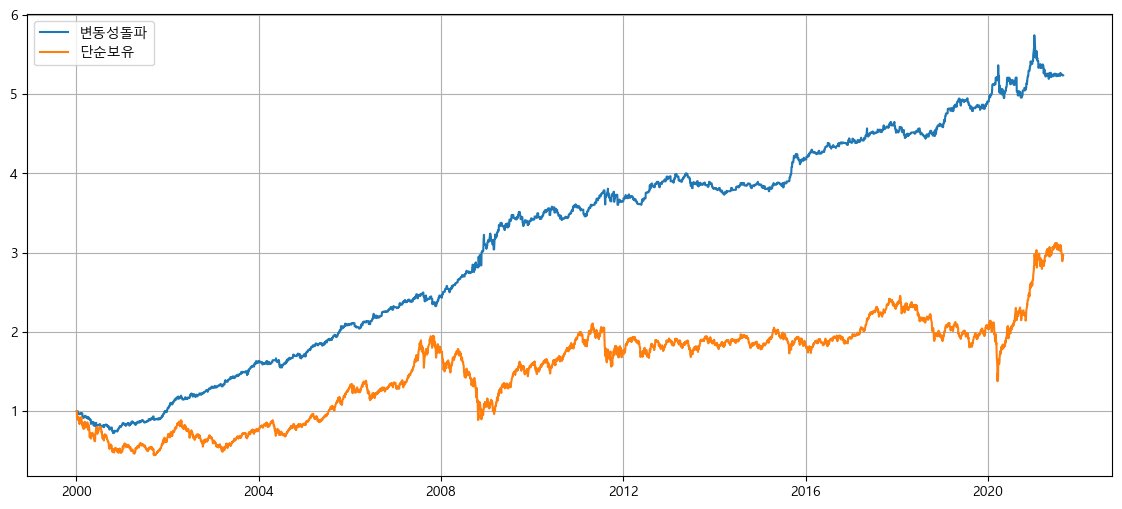

In [35]:
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin" :
    plt.rc("font", family = "AppleGothic")
else:
    plt.rc("font", family = "Malgun Gothic")

plt.figure(figsize=(14,6))
plt.grid(True, axis="y")
plt.grid(True, axis="x")
plt.plot(df["누적수익률"], label = "변동성돌파")
plt.plot(df["Close"] / df["Close"].iloc[0], label = "단순보유")
plt.legend()
plt.show()


In [37]:
# MDD 출력 > 시각화 

df["전고점"] = df["누적수익률"].cummax()
df["DD"] = (1 - df["누적수익률"] / df["전고점"] ) * 100
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,전고점,DD
Date,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,0.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,0.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,0.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,0.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,5.739762,8.754419
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,5.739762,8.754419
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,5.739762,8.754419


c:\새 폴더\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


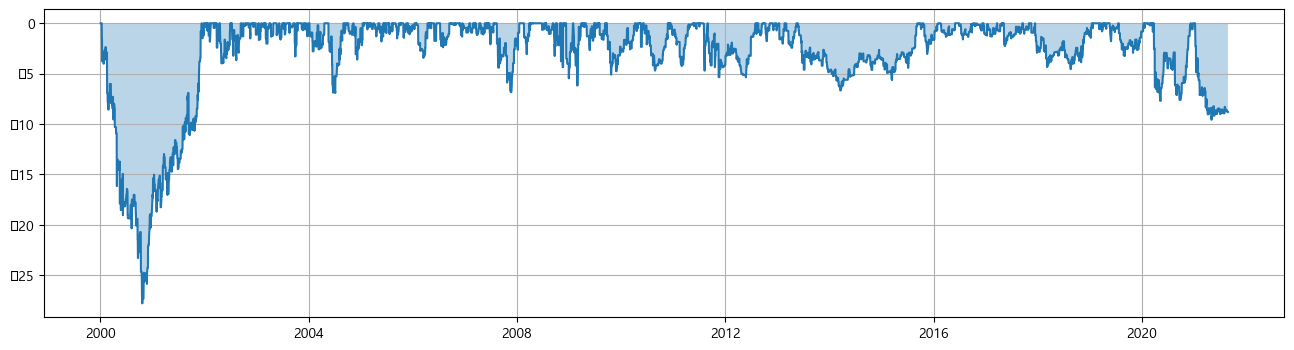

In [44]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(df["DD"] * -1)
plt.fill_between(df.index, df["DD"] * -1, alpha= 0.3)
plt.show()


In [45]:
df["DD"].max()

27.779726849588627

In [47]:
#10일치 평균 이동선 
df["MA10"] = df["Close"].rolling(10).mean()
df.iloc[8:15]

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10
Date,,,,,,,,,,,,
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560,0.977794,0.962386,1.0,3.761404,NaN
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090,1.004269,0.966495,1.0,3.350535,976.072
2000-01-18,981.53,992.31,992.85,967.96,24.89,35.34,1009.980,1.000000,0.966495,1.0,3.350535,968.321
2000-01-19,938.78,969.31,977.00,938.74,38.26,24.89,981.755,1.000000,0.966495,1.0,3.350535,963.568
2000-01-20,945.90,927.12,945.90,906.26,39.64,38.26,946.250,1.000000,0.966495,1.0,3.350535,962.079
2000-01-21,925.16,928.55,942.20,911.83,30.37,39.64,948.370,1.000000,0.966495,1.0,3.350535,959.730
2000-01-24,926.77,917.93,944.31,915.70,28.61,30.37,933.115,0.993200,0.959923,1.0,4.007733,953.683


In [50]:
df["매매신호"] = df["Open"] >= df["MA10"].shift(1)
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10,매매신호
Date,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,0.000000,NaN,False
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,0.000000,NaN,False
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,0.000000,NaN,False
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,0.000000,NaN,False
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,0.000000,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,5.739762,8.754419,3165.447,False
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,5.739762,8.754419,3153.235,False
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,5.739762,8.754419,3143.597,False


In [61]:
df["수익룰2"] = np.where(
    (df["매매신호"]==1) & (df["High"] >= df["목표가"]),
    df["Close"] / df["목표가"],
    1
)
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10,매매신호,수익룰2,누적수익률2,전고점2,DD2
Date,,,,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.0,1.0,0.0
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.0,1.0,0.0
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.0,1.0,0.0
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.0,1.0,0.0
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,5.739762,8.754419,3165.447,False,1.0,1.0,1.0,0.0
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,5.739762,8.754419,3153.235,False,1.0,1.0,1.0,0.0
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,5.739762,8.754419,3143.597,False,1.0,1.0,1.0,0.0


In [62]:
df["누적수익률2"] = df["수익룰2"].cumprod()
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10,매매신호,수익룰2,누적수익률2,전고점2,DD2
Date,,,,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.0,0.0
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.0,0.0
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.0,0.0
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.0,0.0
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,5.739762,8.754419,3165.447,False,1.0,2.187659,1.0,0.0
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,5.739762,8.754419,3153.235,False,1.0,2.187659,1.0,0.0
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,5.739762,8.754419,3143.597,False,1.0,2.187659,1.0,0.0


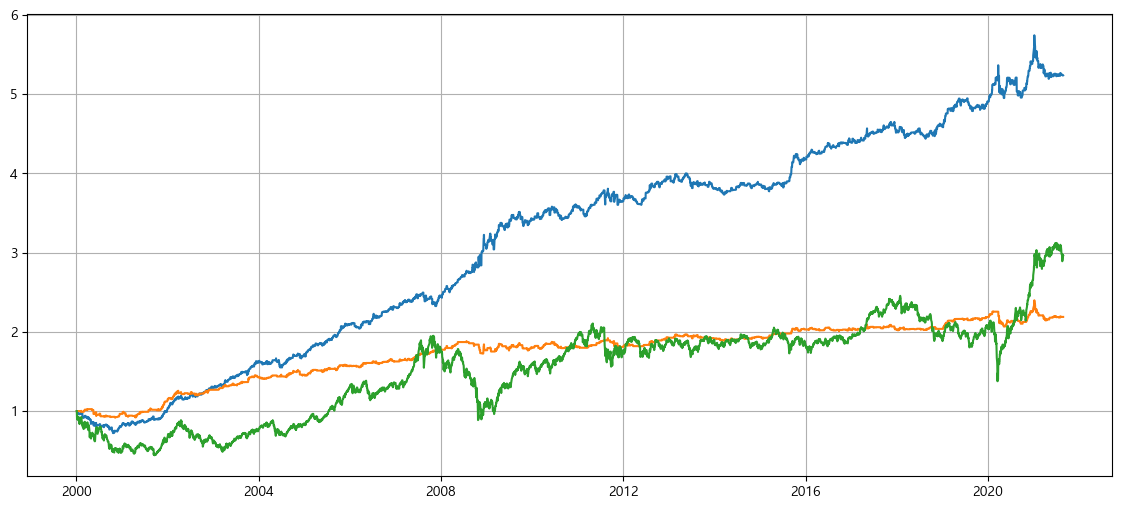

In [63]:
plt.figure(figsize=(14,6))
plt.grid(True)
plt.plot(df["누적수익률"], label = "변동성돌파")
plt.plot(df["누적수익률2"], label = "변동성골파(마켓)")
plt.plot(df["Close"]/df["Close"].iloc[0], label="단순보유" )

In [67]:
df["전고점2"] = df["누적수익률2"].cummax()
df["DD2"] = (1- df["누적수익률2"] / df["전고점2"]) *100
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10,매매신호,수익룰2,누적수익률2,전고점2,DD2
Date,,,,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.000000,0.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.000000,0.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.000000,0.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.000000,0.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,0.000000,NaN,False,1.0,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,5.739762,8.754419,3165.447,False,1.0,2.187659,2.397249,8.742933
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,5.739762,8.754419,3153.235,False,1.0,2.187659,2.397249,8.742933
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,5.739762,8.754419,3143.597,False,1.0,2.187659,2.397249,8.742933


In [65]:
df["DD2"].max()

10.556892232762005

c:\새 폴더\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


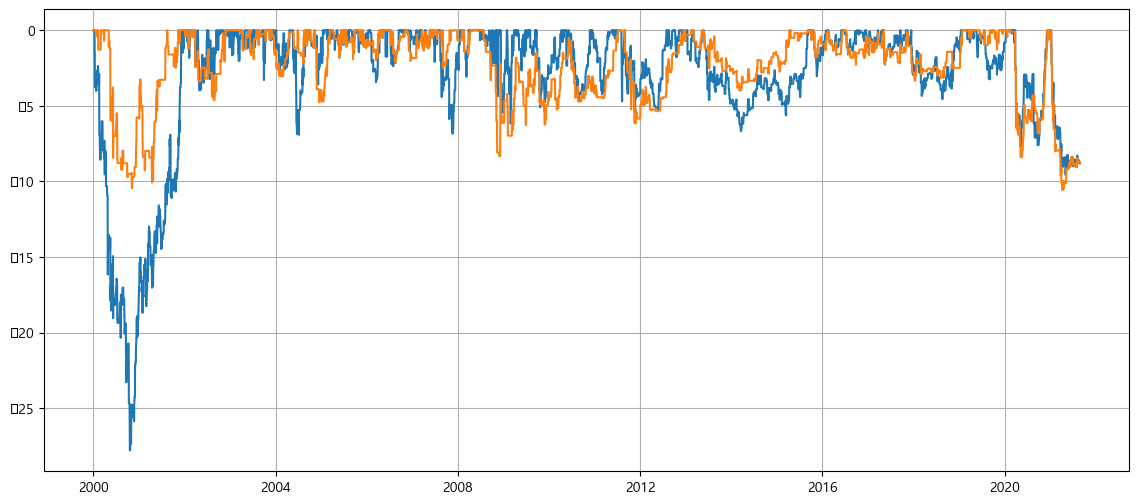

In [70]:
plt.figure(figsize=(14,6))
plt.grid(True)
plt.plot(df["DD"]* -1, label = "VB")
plt.plot(df["DD2"]* -1, label = "VBM")
plt.show()